# Effect of COVID-19 on Boston City's Service Request (311 Requests)

In this study, I wanted to compare two unique time periods: the pre-COVID era, which includes data up to the year 2019, and the post-COVID era, which includes data from 2020 to the most recent accessible information in 2021. My investigation spans numerous fronts as we dive into different areas to acquire an in-depth understanding of the worldwide pandemic's consequences.

Key areas of investigation include:
1. What is the distribution of different case types in the dataset?
2. What are the top locations with the highest number of cases? 
3. How do the number of cases vary over time?
4. How does season affect number of cases?
5. How are the cases reported to authorities?
6. How has the ratio of opened to closed cases evolved over time?
7. How has the average resolution time changed through years?
8. What is the average resolution time for each type of case?
9. Are there any outliers in the resolution time? If so, what types of cases are associated with these outliers?
10. Is there any correlation between the resolution time and other numeric columns, such as the time it was open or closed?

## Loading Required Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
from scipy.stats import pearsonr

## Loading Data

In [2]:
# Read data from csv
pre_covid_records = pd.read_csv('D:/Sem 1/IS 597 - PR/Final Assignment(Group Project)/311_Cases_2015_2019_Unrestricted.csv')
post_covid_records = pd.read_csv('D:/Sem 1/IS 597 - PR/Final Assignment(Group Project)/311_Cases_2020_2024_Unrestricted.csv')

In [3]:
pre_covid_records.head(5)

,Unnamed: 0,TYPE,CASE_ENQUIRY_ID,CLOSED_DT,LOCATION,OPEN_DT,REASON,SOURCE,SUBJECT,LocationID,...,ObjectID,PUBLIC,HOUSING,UNCIVILUSE,BIGBUILD,GRAFFITI,TRASH,PRIVATENEGLECT,PUBLICDENIG,PROBLEM
0,45708,Animal Found,101001240881,NaN,"961 William T Morrissey Blvd, Dorchester, MA ...",2015-01-01,Animal Issues,Constituent Call,Animal Control,1.602538e+09,...,NaN,0,0,0,0,0,0,0,0,0
1,45887,Animal Found,101001240807,NaN,"27 Shepard St, Brighton, MA 02135",2015-01-01,Animal Issues,Constituent Call,Animal Control,2.205456e+09,...,NaN,0,0,0,0,0,0,0,0,0
2,46110,Animal Found,101001240873,NaN,"834-842 Morton St, Dorchester, MA 02124",2015-01-01,Animal Issues,Constituent Call,Animal Control,1.403860e+09,...,NaN,0,0,0,0,0,0,0,0,0
3,46395,Animal Found,101001240750,NaN,"730 Adams St, Dorchester, MA 02122",2015-01-01,Animal Issues,Constituent Call,Animal Control,1.603632e+09,...,NaN,0,0,0,0,0,0,0,0,0
4,46468,Animal Found,101001240740,NaN,"4833 Washington St, West Roxbury, MA 02132",2015-01-01,Animal Issues,Constituent Call,Animal Control,2.002788e+09,...,NaN,0,0,0,0,0,0,0,0,0


In [4]:
pre_covid_records = pre_covid_records[['TYPE', 'CASE_ENQUIRY_ID', 'CLOSED_DT', 'LOCATION', 'OPEN_DT', 'REASON', 'SOURCE', 
                                       'SUBJECT', 'LocationID', 'X', 'Y', 'NSA_NAME', 'BRA_PD']]
pre_covid_records.head(5)

,TYPE,CASE_ENQUIRY_ID,CLOSED_DT,LOCATION,OPEN_DT,REASON,SOURCE,SUBJECT,LocationID,X,Y,NSA_NAME,BRA_PD
0,Animal Found,101001240881,NaN,"961 William T Morrissey Blvd, Dorchester, MA ...",2015-01-01,Animal Issues,Constituent Call,Animal Control,1.602538e+09,-71.047358,42.291380,Neponset/Port Norfolk,South Dorchester
1,Animal Found,101001240807,NaN,"27 Shepard St, Brighton, MA 02135",2015-01-01,Animal Issues,Constituent Call,Animal Control,2.205456e+09,-71.150565,42.347037,Brighton - St Elizabeth's,Allston/Brighton
2,Animal Found,101001240873,NaN,"834-842 Morton St, Dorchester, MA 02124",2015-01-01,Animal Issues,Constituent Call,Animal Control,1.403860e+09,-71.085420,42.281095,W Codman Hill/W. Lower Mills,Mattapan
3,Animal Found,101001240750,NaN,"730 Adams St, Dorchester, MA 02122",2015-01-01,Animal Issues,Constituent Call,Animal Control,1.603632e+09,-71.055173,42.284816,Neponset/Port Norfolk,South Dorchester
4,Animal Found,101001240740,NaN,"4833 Washington St, West Roxbury, MA 02132",2015-01-01,Animal Issues,Constituent Call,Animal Control,2.002788e+09,-71.146118,42.271168,Upper Washington/Spring St,West Roxbury


In [5]:
post_covid_records.head(5)

,TYPE,CASE_ENQUIRY_ID,CLOSED_DT,LOCATION,OPEN_DT,REASON,SOURCE,SUBJECT,LocationID,X,...,PUBLIC,HOUSING,UNCIVILUSE,BIGBUILD,GRAFFITI,TRASH,PRIVATENEGLECT,PUBLICDENIG,PROBLEM,propid
0,Abandoned Bicycle,101003148635,2020-03-12,"70 Burbank St, Boston, MA 02115",2020-01-01,Abandoned Bicycle,Mobile Request,Mayor's 24 Hour Hotline,4.014760e+08,-71.088920,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,A162736
1,Abandoned Bicycle,101003148558,2020-01-13,"461 Gallivan Blvd, Dorchester, MA 02124",2020-01-01,Abandoned Bicycle,Constituent Call,Mayor's 24 Hour Hotline,1.605083e+09,-71.057980,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,A62325
2,Abandoned Vehicles,101003148571,2020-01-13,"INTERSECTION of Milwood St & Gallivan Blvd, Do...",2020-01-01,Enforcement & Abandoned Vehicles,Mobile Request,Transportation - Traffic Division,NaN,-71.057802,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,I11942
3,Abandoned Vehicles,101003148542,2020-01-18,"10 Stanbro St, Hyde Park, MA 02136",2020-01-01,Enforcement & Abandoned Vehicles,Mobile Request,Transportation - Traffic Division,1.809755e+09,-71.132410,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A130087
4,Abandoned Vehicles,101003148439,2020-01-02,"8 Pleasanton St, Dorchester, MA 02121",2020-01-01,Enforcement & Abandoned Vehicles,Mobile Request,Transportation - Traffic Division,1.202261e+09,-71.087270,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A111359


In [6]:
post_covid_records = post_covid_records[['TYPE', 'CASE_ENQUIRY_ID', 'CLOSED_DT', 'LOCATION', 'OPEN_DT', 'REASON', 'SOURCE', 
                                       'SUBJECT', 'LocationID', 'X', 'Y', 'NSA_NAME', 'BRA_PD']]
post_covid_records.head(5)

,TYPE,CASE_ENQUIRY_ID,CLOSED_DT,LOCATION,OPEN_DT,REASON,SOURCE,SUBJECT,LocationID,X,Y,NSA_NAME,BRA_PD
0,Abandoned Bicycle,101003148635,2020-03-12,"70 Burbank St, Boston, MA 02115",2020-01-01,Abandoned Bicycle,Mobile Request,Mayor's 24 Hour Hotline,4.014760e+08,-71.088920,42.344290,Fenway,Fenway/Kenmore
1,Abandoned Bicycle,101003148558,2020-01-13,"461 Gallivan Blvd, Dorchester, MA 02124",2020-01-01,Abandoned Bicycle,Constituent Call,Mayor's 24 Hour Hotline,1.605083e+09,-71.057980,42.282010,East Lower Mills/Cedar Grove,South Dorchester
2,Abandoned Vehicles,101003148571,2020-01-13,"INTERSECTION of Milwood St & Gallivan Blvd, Do...",2020-01-01,Enforcement & Abandoned Vehicles,Mobile Request,Transportation - Traffic Division,NaN,-71.057802,42.282298,NaN,NaN
3,Abandoned Vehicles,101003148542,2020-01-18,"10 Stanbro St, Hyde Park, MA 02136",2020-01-01,Enforcement & Abandoned Vehicles,Mobile Request,Transportation - Traffic Division,1.809755e+09,-71.132410,42.235530,Readville,Hyde Park
4,Abandoned Vehicles,101003148439,2020-01-02,"8 Pleasanton St, Dorchester, MA 02121",2020-01-01,Enforcement & Abandoned Vehicles,Mobile Request,Transportation - Traffic Division,1.202261e+09,-71.087270,42.310860,Washington Park,Roxbury


## Data Cleaning

In [7]:
pre_covid_records.dtypes

TYPE                object
CASE_ENQUIRY_ID      int64
CLOSED_DT           object
LOCATION            object
OPEN_DT             object
REASON              object
SOURCE              object
SUBJECT             object
LocationID         float64
X                  float64
Y                  float64
NSA_NAME            object
BRA_PD              object
dtype: object

In [8]:
pre_covid_records['OPEN_DT'] = pd.to_datetime(pre_covid_records['OPEN_DT'])
pre_covid_records['CLOSED_DT'] = pd.to_datetime(pre_covid_records['CLOSED_DT'])
pre_covid_records.dtypes

TYPE                       object
CASE_ENQUIRY_ID             int64
CLOSED_DT          datetime64[ns]
LOCATION                   object
OPEN_DT            datetime64[ns]
REASON                     object
SOURCE                     object
SUBJECT                    object
LocationID                float64
X                         float64
Y                         float64
NSA_NAME                   object
BRA_PD                     object
dtype: object

In [9]:
post_covid_records.dtypes

TYPE                object
CASE_ENQUIRY_ID      int64
CLOSED_DT           object
LOCATION            object
OPEN_DT             object
REASON              object
SOURCE              object
SUBJECT             object
LocationID         float64
X                  float64
Y                  float64
NSA_NAME            object
BRA_PD              object
dtype: object

In [10]:
post_covid_records['OPEN_DT'] = pd.to_datetime(post_covid_records['OPEN_DT'])
post_covid_records['CLOSED_DT'] = pd.to_datetime(post_covid_records['CLOSED_DT'])
post_covid_records.dtypes

TYPE                       object
CASE_ENQUIRY_ID             int64
CLOSED_DT          datetime64[ns]
LOCATION                   object
OPEN_DT            datetime64[ns]
REASON                     object
SOURCE                     object
SUBJECT                    object
LocationID                float64
X                         float64
Y                         float64
NSA_NAME                   object
BRA_PD                     object
dtype: object

## Defining Required Functions

In [11]:
def get_freq(df, groupingColumn):
    return df.groupby(groupingColumn)['CASE_ENQUIRY_ID'].nunique()

In [12]:
def get_season(date):
    if type(date) is str:
        date = dt.datetime.strptime(date, '%Y-%m-%d')
    seasons = {'SPRING': [3,4,5], 'SUMMER': [6,7,8], 'FALL': [9,10,11], 'WINTER': [12,1,2]}
    for season, months in seasons.items():
        if date.month in months:
            return season

In [13]:
def resolution_time(df):
        df['RESOLUTION_TIME'] = (df['CLOSED_DT'] - df['OPEN_DT']).dt.days
        return df

In [14]:
# Group records by year and calculate the monthly mean resolution time
def calculate_monthly_mean_resolution(records):
    years = records['OPEN_DT'].dt.year.unique()
    records_by_year = {}
    for year in years:
        records_by_year[year] = records[records['OPEN_DT'].dt.year == year]

    monthly_means = []
    for year, records in records_by_year.items():
        monthly_mean = [records[records['OPEN_DT'].dt.month == month]['RESOLUTION_TIME'].mean(skipna=True) for month in range(1, 13)]
        monthly_means.append((year, monthly_mean))

    return monthly_means

## Data Analysis

### 1. What is the distribution of different case types in the dataset?

In [15]:
# Count each type of request and arrange them in decreasing order
pre_covid_type = get_freq(pre_covid_records, 'TYPE').reset_index(name='COUNT') \
    .sort_values(['COUNT'], ascending = False)

In [16]:
pre_covid_type['Percentage'] = pre_covid_type['COUNT'] / pre_covid_type['COUNT'].sum() * 100

print("Top 10 most common requests during 2015-2019")
top10_pre_covid_type = pre_covid_type.head(10)
print(top10_pre_covid_type)

Top 10 most common requests during 2015-2019
                                            TYPE   COUNT  Percentage
59                               General Request  175288   12.344651
127                          Parking Enforcement  152303   10.725934
160                 Requests for Street Cleaning   83461    5.877738
97   Missed Trash/Recycling/Yard Waste/Bulk Item   65984    4.646921
155                   Request for Pothole Repair   59999    4.225427
167                  Schedule a Bulk Item Pickup   57681    4.062182
80           Improper Storage of Trash (Barrels)   52812    3.719283
157                     Request for Snow Plowing   41207    2.902002
25                                 CE Collection   37325    2.628612
187                         Street Light Outages   36854    2.595442


<Figure size 1200x800 with 0 Axes>

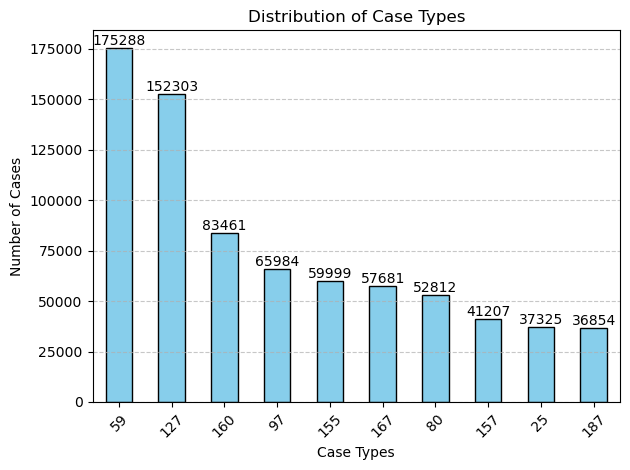

In [17]:
case_type_distribution_pre_covid = top10_pre_covid_type[['TYPE', 'COUNT']]

# Plotting the distribution with added information
plt.figure(figsize=(12, 8))
ax = case_type_distribution_pre_covid.plot(kind='bar', color='skyblue', edgecolor='black', legend = False)

# Adding data labels
for i, count in enumerate(case_type_distribution_pre_covid['COUNT']):
    ax.text(i, count, str(count), ha='center', va='bottom')
    
plt.title('Distribution of Case Types')
plt.xlabel('Case Types')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

| Index No | Type |
|:--------:|:--------:|
|   59   |  General Request   |
|   127   |   Parking Enforcement  |
|   160   |  Requests for Street Cleaning   |
|   97   |  Missed Trash/Recycling/Yard Waste/Bulk Item   |
|   155   |  Request for Pothole Repair   |
|   167   |  Schedule a Bulk Item Pickup   |
|   80   |  Improper Storage of Trash (Barrels)   |
|   157   |  Request for Snow Plowing   |
|   25   |  CE Collection   |
|   187   |  Street Light Outages   |                       

In [18]:
post_covid_type = get_freq(post_covid_records, 'TYPE').reset_index(name='COUNT') \
    .sort_values(['COUNT'], ascending = False)

In [19]:
post_covid_type['Percentage'] = post_covid_type['COUNT'] / post_covid_type['COUNT'].sum() * 100
print("Top 10 most common requests during 2020-2023")
top10_post_covid_type = post_covid_type.head(10)
print(top10_post_covid_type)

Top 10 most common requests during 2020-2023
                                            TYPE   COUNT  Percentage
107                          Parking Enforcement  153353   16.191028
51                               General Request  141766   14.967671
138                 Requests for Street Cleaning   57325    6.052380
67           Improper Storage of Trash (Barrels)   41473    4.378724
83   Missed Trash/Recycling/Yard Waste/Bulk Item   39458    4.165980
145                  Schedule a Bulk Item Pickup   35720    3.771322
25                                 CE Collection   34115    3.601866
133                   Request for Pothole Repair   32353    3.415834
87                                 Needle Pickup   28820    3.042819
122                  Poor Conditions of Property   19008    2.006867


<Figure size 1200x800 with 0 Axes>

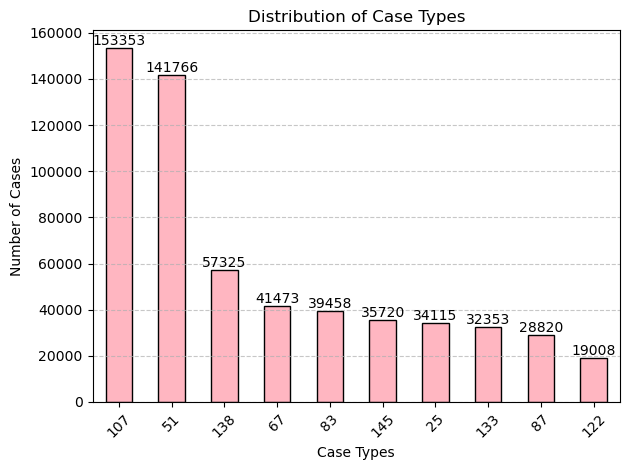

In [20]:
case_type_distribution_post_covid = top10_post_covid_type[['TYPE', 'COUNT']]

# Plotting the distribution with added information
plt.figure(figsize=(12, 8))
ax = case_type_distribution_post_covid.plot(kind='bar', color='lightpink', edgecolor='black', legend = False)

# Adding data labels
for i, count in enumerate(case_type_distribution_post_covid['COUNT']):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.title('Distribution of Case Types')
plt.xlabel('Case Types')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

| Index No | Type |
|:--------:|:--------:|
|   107   |  Parking Enforcement   |
|   51   |   General Request  |
|   138   |  Requests for Street Cleaning   |
|   67   |   Improper Storage of Trash (Barrels)  |
|   83   |  Missed Trash/Recycling/Yard Waste/Bulk Item   |
|   145   |  Schedule a Bulk Item Pickup   |
|   25   |  CE Collection   |
|   133   |  Request for Pothole Repair   |
|   87   |   Needle Pickup  |
|   122   |  Poor Conditions of Property   | 

### 2. What are the top locations with the highest number of cases?

In [21]:
pre_covid_location = get_freq(pre_covid_records, 'LOCATION') \
    .reset_index(name='COUNT').sort_values(['COUNT'],ascending = False)

pre_covid_location['Percentage'] = pre_covid_location['COUNT'] / pre_covid_location['COUNT'].sum() * 100

print("Top 10 locations with highest number of complaints during 2015-2019")
top10_pre_covid_location = pre_covid_location.head(10)
top10_pre_covid_location

Top 10 locations with highest number of complaints during 2015-2019


,LOCATION,COUNT,Percentage
783,"1 City Hall Plz, Boston, MA 02108",4792,0.348709
3763,"100 City Hall Plz, Boston, MA 02108",1376,0.100130
124146,"INTERSECTION of Cross St & Hanover St, Boston,...",585,0.042570
128420,INTERSECTION of Massachusetts Ave & Melnea Cas...,569,0.041406
128415,INTERSECTION of Massachusetts Ave & Huntington...,494,0.035948
122022,"INTERSECTION of Boylston St & Park Dr, Boston,...",466,0.033910
106112,"75 W Rutland Sq, Roxbury, MA 02118",443,0.032237
18094,"139 Tremont St, Boston, MA 02108",421,0.030636
24222,"1530 Washington St, Roxbury, MA 02118",410,0.029835
24241,"1535 Washington St, Roxbury, MA 02118",408,0.029690


<Figure size 1400x800 with 0 Axes>

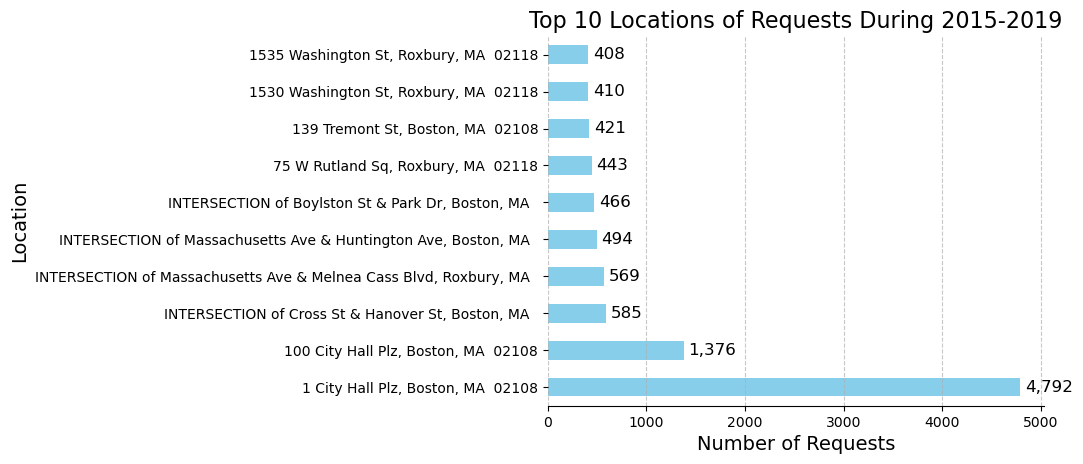

In [22]:
location_type_distribution_pre_covid = top10_pre_covid_location[['LOCATION','COUNT']]

plt.figure(figsize=(14, 8))
ax = location_type_distribution_pre_covid.plot.barh(x='LOCATION', y='COUNT', color='skyblue', legend=False)

# Adding data labels
for i, count in enumerate(location_type_distribution_pre_covid['COUNT']):
    ax.text(count + 50, i, f'{count:,}',ha='left', va='center', fontsize=12, color='black')

plt.title('Top 10 Locations of Requests During 2015-2019', fontsize=16)
plt.xlabel('Number of Requests', fontsize=14)
plt.ylabel('Location', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Remove spines (borders) for better aesthetics
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

In [23]:
post_covid_location = get_freq(post_covid_records, 'LOCATION') \
    .reset_index(name='COUNT').sort_values(['COUNT'],ascending = False)

post_covid_location['Percentage'] = post_covid_location['COUNT'] / post_covid_location['COUNT'].sum() * 100

print("\nTop 10 locations with highest number of complaints during 2020-2023")
top10_post_covid_location = post_covid_location.head(10)
top10_post_covid_location


Top 10 locations with highest number of complaints during 2020-2023


,LOCATION,COUNT,Percentage
193,"1 City Hall Plz, Boston, MA 02108",3615,0.386996
2854,"100 City Hall Plz, Boston, MA 02108",1597,0.170964
96131,"75 W Rutland Sq, Roxbury, MA 02118",538,0.057594
110799,"INTERSECTION of Chandler St & Clarendon St, Bo...",525,0.056203
12374,"124 Main St, Charlestown, MA 02129",514,0.055025
23746,"160 Southampton St, Roxbury, MA 02118",425,0.045498
110800,"INTERSECTION of Chandler St & Columbus Ave, Bo...",412,0.044106
79939,"544P Massachusetts Ave, Roxbury, MA 02118",409,0.043785
110798,"INTERSECTION of Chandler St & Cazenove St, Bos...",402,0.043035
21449,"1535 Washington St, Roxbury, MA 02118",395,0.042286


<Figure size 1400x800 with 0 Axes>

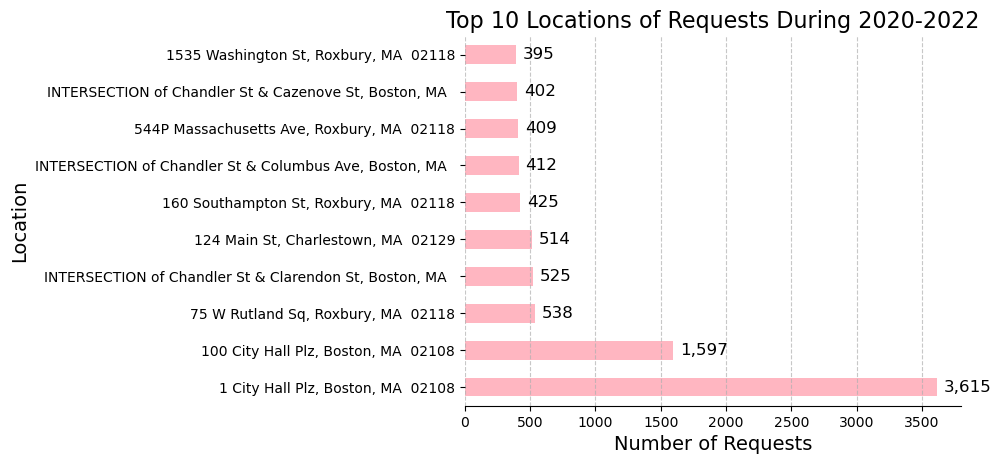

In [24]:
location_type_distribution_post_covid = top10_post_covid_location[['LOCATION','COUNT']]

plt.figure(figsize=(14, 8))
ax = location_type_distribution_post_covid.plot.barh(x='LOCATION', y='COUNT', color='lightpink', legend=False)

# Adding data labels
for i, count in enumerate(location_type_distribution_post_covid['COUNT']):
    ax.text(count + 50, i, f'{count:,}',ha='left', va='center', fontsize=12, color='black')

plt.title('Top 10 Locations of Requests During 2020-2022', fontsize=16)
plt.xlabel('Number of Requests', fontsize=14)
plt.ylabel('Location', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Remove spines (borders) for better aesthetics
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

### 3. How do cases vary over time?

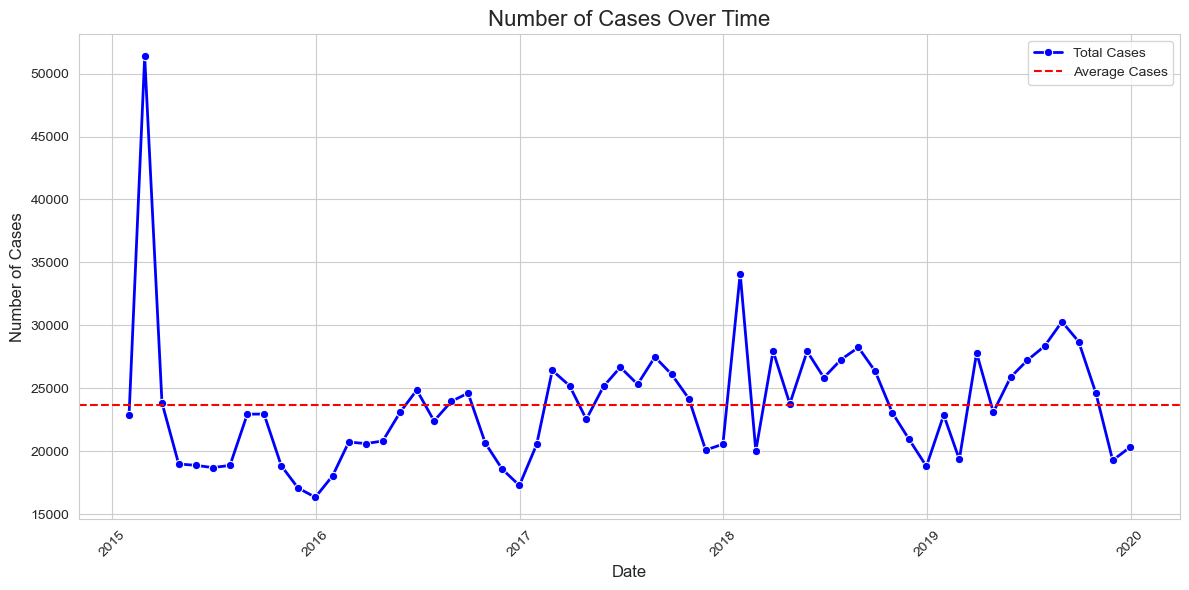

In [25]:
pre_covid_time = pre_covid_records.set_index('OPEN_DT', inplace=False)

# Resample data to get counts per month (you can use other frequencies like 'D' for days, 'W' for weeks, etc.)
monthly_case_counts = pre_covid_time['CASE_ENQUIRY_ID'].resample('M').count()

# Calculate the average number of cases per month
monthly_avg_case_counts = monthly_case_counts.sum()/len(monthly_case_counts)

# Create a more visually appealing plot using Seaborn
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Customize the style of the plot

# Plotting total number of cases
ax = sns.lineplot(data=monthly_case_counts, marker='o', color='b', linewidth=2, label='Total Cases')

# Plotting average number of cases
ax.axhline(y=monthly_avg_case_counts, linestyle='--', color='r', label='Average Cases')

ax.set_title('Number of Cases Over Time', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Number of Cases', fontsize=12)
ax.tick_params(labelsize=10)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Add a legend
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

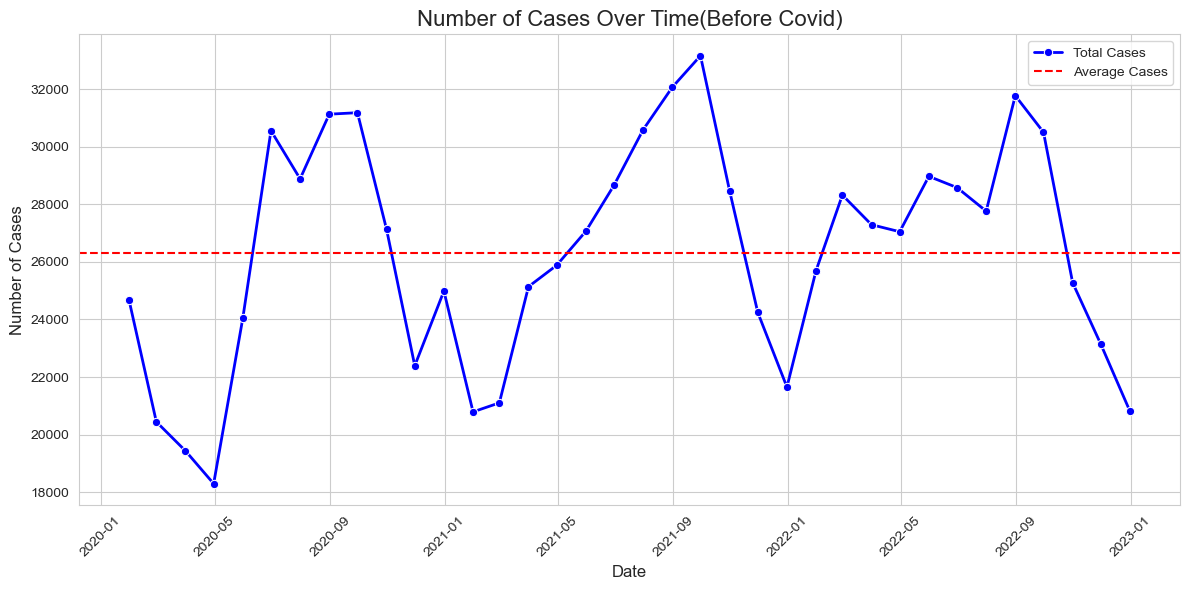

In [26]:
post_covid_time = post_covid_records.set_index('OPEN_DT', inplace=False)

# Resample data to get counts per month (you can use other frequencies like 'D' for days, 'W' for weeks, etc.)
monthly_case_counts = post_covid_time['CASE_ENQUIRY_ID'].resample('M').count()

# Calculate the average number of cases per month
monthly_avg_case_counts = monthly_case_counts.sum()/len(monthly_case_counts)

# Create a more visually appealing plot using Seaborn
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Customize the style of the plot

# Plotting total number of cases
ax = sns.lineplot(data=monthly_case_counts, marker='o', color='b', linewidth=2, label = 'Total Cases')

# Plotting average number of cases
ax.axhline(y=monthly_avg_case_counts, linestyle='--', color='r', label='Average Cases')

ax.set_title(f'Number of Cases Over Time(Before Covid)', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Number of Cases', fontsize=12)
ax.tick_params(labelsize=10)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Add a legend
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

### 4. How does season affect number of cases?

In [27]:
pre_covid_records['SEASON'] = pre_covid_records['OPEN_DT'].apply(lambda entry : get_season(entry))
post_covid_records['SEASON'] = post_covid_records['OPEN_DT'].apply(lambda entry : get_season(entry))


pre_covid_season = get_freq(pre_covid_records, 'SEASON') \
    .reset_index(name='COUNT').sort_values(['COUNT'],ascending = False)

pre_covid_season['Percentage'] = pre_covid_season['COUNT'] / pre_covid_season['COUNT'].sum() * 100

print("Complaints by Seasons during 2015-2019")
print(pre_covid_season)

post_covid_season = get_freq(post_covid_records, 'SEASON') \
    .reset_index(name='COUNT').sort_values(['COUNT'],ascending = False)

post_covid_season['Percentage'] = post_covid_season['COUNT'] / post_covid_season['COUNT'].sum() * 100

print("\nComplaints by Seasons during 2020-2022")
print(post_covid_season)

# Observe that the 311 cases during SPRING 2020 dropped by a significant margin compared to SPRING 2015-2019
# This could be the reason behind increase of cases in SUMMER 2020 and FALL 2020

Complaints by Seasons during 2015-2019
   SEASON   COUNT  Percentage
2  SUMMER  378523   26.657469
1  SPRING  355632   25.045371
3  WINTER  349713   24.628526
0    FALL  336083   23.668634

Complaints by Seasons during 2020-2022
   SEASON   COUNT  Percentage
2  SUMMER  270019   28.508639
0    FALL  245498   25.919708
1  SPRING  223162   23.561471
3  WINTER  208469   22.010182


In [28]:
type(pre_covid_season)

pandas.core.frame.DataFrame

In [29]:
# Merge dataframes based on the 'SEASON' column
merged_data = pre_covid_season.merge(post_covid_season, on='SEASON', suffixes=('_PreCovid', '_PostCovid'))

diff = merged_data['Percentage_PostCovid'] - merged_data['Percentage_PreCovid']

# Calculate the increase or decrease in percentages
merged_data['Percentage Change'] = diff / merged_data['Percentage_PreCovid'] * 100

# Display the merged dataframe
merged_data[['SEASON', 'Percentage Change']]

,SEASON,Percentage Change
0,SUMMER,6.944280
1,SPRING,-5.924849
2,WINTER,-10.631346
3,FALL,9.510793


In [30]:
post_covid_records['YEAR'] = post_covid_records['OPEN_DT'].dt.year

# Group the data by 'YEAR' and 'SEASON', then count the occurrences of each season within each year
post_seasonal_counts = post_covid_records.groupby(['SEASON', 'YEAR'])['SEASON'].count()

# Print the seasonal counts for each year
post_seasonal_counts_df = post_seasonal_counts.to_frame(name="COUNT")
post_seasonal_counts_df

COUNT
SEASON YEAR       
FALL   2020  80703
       2021  85874
       2022  78921
SPRING 2020  61766
       2021  78084
       2022  83312
SUMMER 2020  90576
       2021  91322
       2022  88121
WINTER 2020  70099
       2021  63540
       2022  74830

In [31]:
pre_covid_records['YEAR'] = pre_covid_records['OPEN_DT'].dt.year

# Group the data by 'YEAR' and 'SEASON', then count the occurrences of each season within each year
seasonal_counts = pre_covid_records.groupby(['SEASON', 'YEAR'])['SEASON'].count()

# Print the seasonal counts for each year
seasonal_counts_df = seasonal_counts.to_frame(name="COUNT")
seasonal_counts_df

COUNT
SEASON YEAR       
FALL   2015  58892
       2016  63852
       2017  70386
       2018  70353
       2019  72600
SPRING 2015  61727
       2016  64524
       2017  72907
       2018  79669
       2019  76805
SUMMER 2015  60526
       2016  71237
       2017  79484
       2018  81392
       2019  85884
WINTER 2015  90602
       2016  56065
       2017  67530
       2018  72956
       2019  62560

In [32]:
# Resetting the index for both DataFrames to make 'YEAR' a column
post_seasonal_counts_df_reset = post_seasonal_counts_df.reset_index()
seasonal_counts_df_reset = seasonal_counts_df.reset_index()

# Concatenating the DataFrames vertically, ensuring they align on 'YEAR' and 'SEASON'
union_df = pd.concat([post_seasonal_counts_df_reset, seasonal_counts_df_reset])

# If you want to group by 'YEAR' and 'SEASON' again and sum the counts (in case of overlaps),
# you can group the unioned DataFrame and sum the counts for each group
final_df = union_df.groupby(['YEAR', 'SEASON']).sum().reset_index()

# Print the final DataFrame
print(final_df)

    YEAR  SEASON  COUNT
0   2015    FALL  58892
1   2015  SPRING  61727
2   2015  SUMMER  60526
3   2015  WINTER  90602
4   2016    FALL  63852
5   2016  SPRING  64524
6   2016  SUMMER  71237
7   2016  WINTER  56065
8   2017    FALL  70386
9   2017  SPRING  72907
10  2017  SUMMER  79484
11  2017  WINTER  67530
12  2018    FALL  70353
13  2018  SPRING  79669
14  2018  SUMMER  81392
15  2018  WINTER  72956
16  2019    FALL  72600
17  2019  SPRING  76805
18  2019  SUMMER  85884
19  2019  WINTER  62560
20  2020    FALL  80703
21  2020  SPRING  61766
22  2020  SUMMER  90576
23  2020  WINTER  70099
24  2021    FALL  85874
25  2021  SPRING  78084
26  2021  SUMMER  91322
27  2021  WINTER  63540
28  2022    FALL  78921
29  2022  SPRING  83312
30  2022  SUMMER  88121
31  2022  WINTER  74830


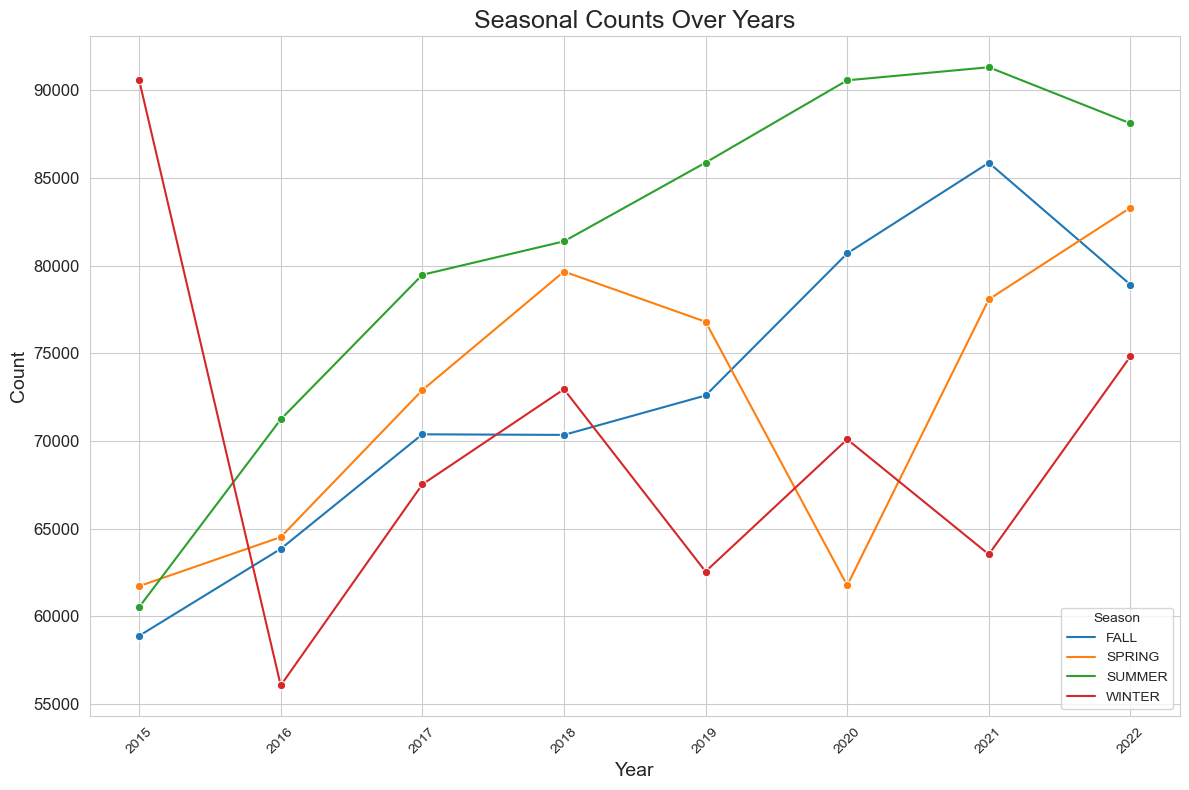

In [33]:
# Create the plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=final_df, x='YEAR', y='COUNT', hue='SEASON', marker='o')

# Customizing the plot
plt.title('Seasonal Counts Over Years', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(final_df['YEAR'].unique(), rotation=45)  # Ensure only unique years are shown
plt.yticks(fontsize=12)
plt.legend(title='Season')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

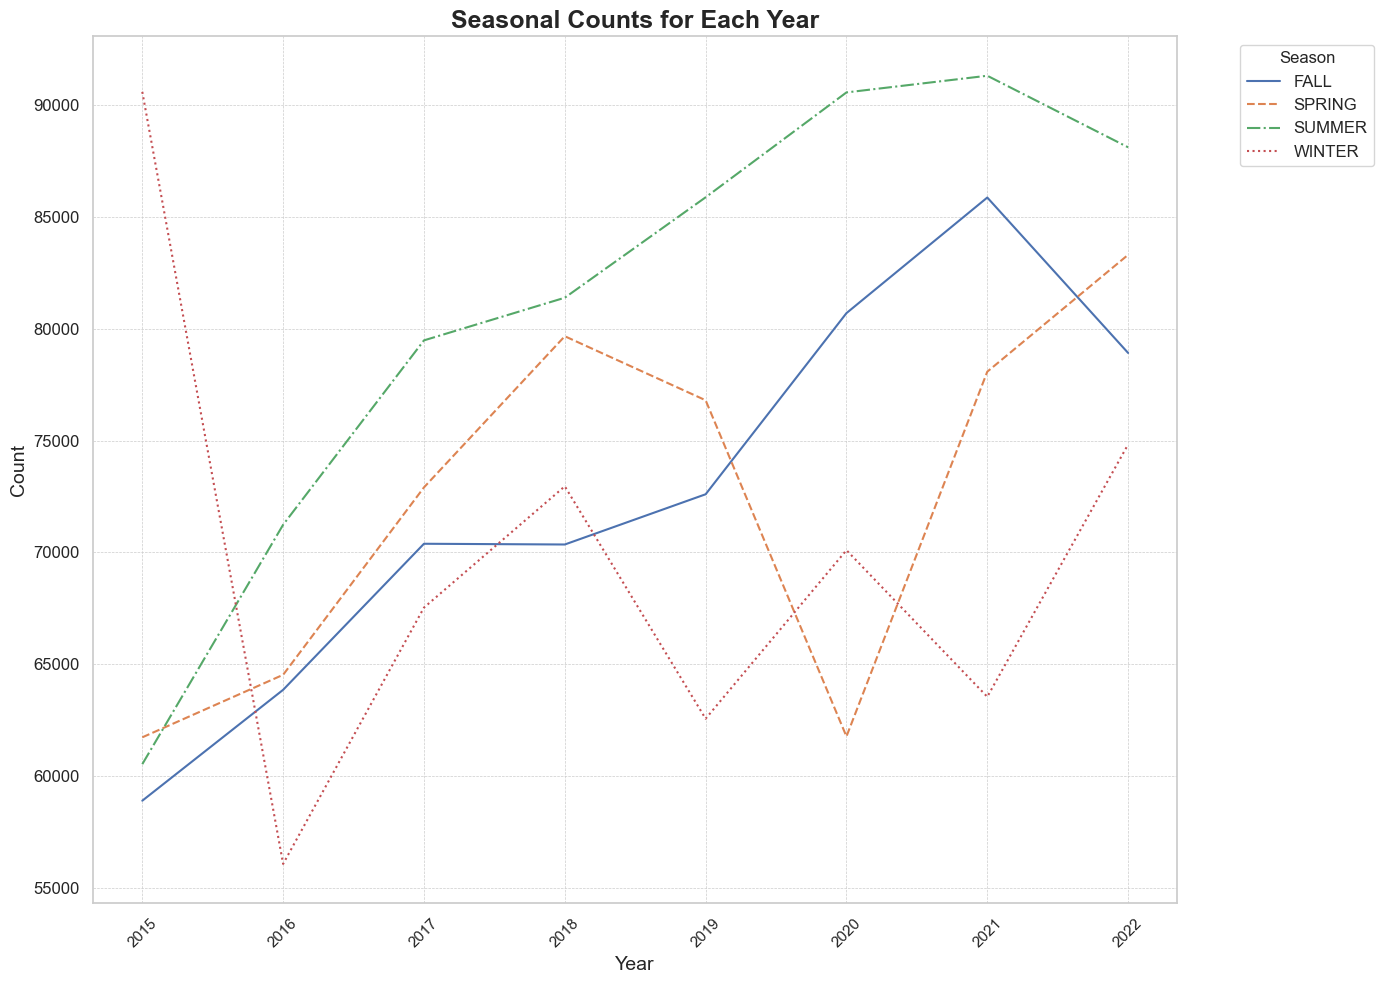

In [34]:
# Use the seaborn style for a nicer layout
sns.set(style="whitegrid")

# Pivot the DataFrame
pivot_seasonal_counts = final_df.pivot(index='YEAR', columns='SEASON', values='COUNT')

# Plotting
plt.figure(figsize=(14, 10))
lines = ['-', '--', '-.', ':']
linecycler = cycle(lines)
for column, line in zip(pivot_seasonal_counts.columns, linecycler):
    plt.plot(pivot_seasonal_counts.index, pivot_seasonal_counts[column], line, label=column)

# Customizing the plot
plt.title('Seasonal Counts for Each Year', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()

### 5. How are the cases reported to authorities?

In [35]:
source_before_covid = pre_covid_records['SOURCE'].value_counts()
print(source_before_covid)

Mobile Request        608584
Constituent Call      554340
City Worker App       120942
Self Service           75882
Employee Generated     58092
Twitter                 1891
Maximo Integration       220
Name: SOURCE, dtype: int64


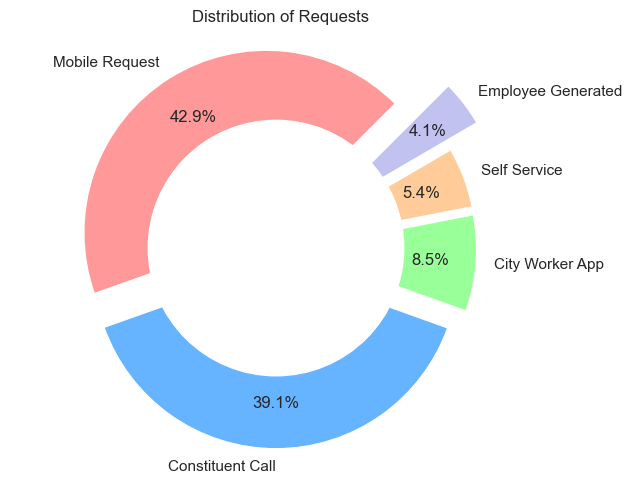

In [36]:
# Data
labels = ['Mobile Request', 'Constituent Call', 'City Worker App', 'Self Service', 'Employee Generated']
sizes = [608584, 554340, 120942, 75882, 58092]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']
explode = (0.1, 0.1, 0.1, 0.1, 0.3)  # To explode some slices for emphasis

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=45, pctdistance=0.75, colors=colors, explode=explode)


# Draw a circle in the center to make it look like a donut chart
center_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  
plt.tight_layout()

# Add a title
plt.title('Distribution of Requests')

# Display the chart
plt.show()


In [37]:
source_after_covid = post_covid_records['SOURCE'].value_counts()
print(source_after_covid)

Mobile Request        501566
Constituent Call      323028
City Worker App        78153
Self Service           29225
Employee Generated     15173
Maximo Integration         2
Twitter                    1
Name: SOURCE, dtype: int64


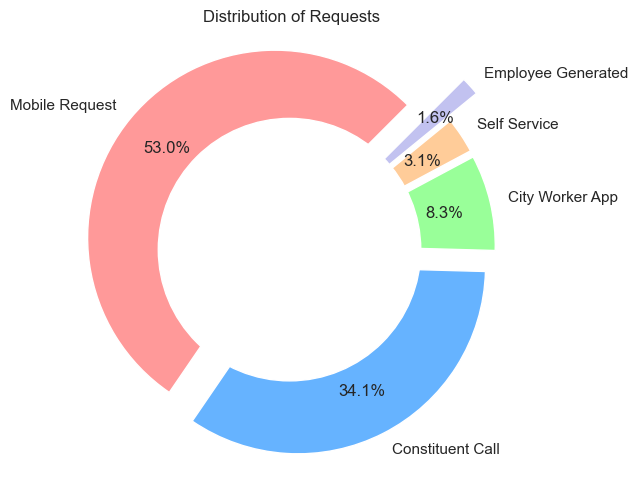

In [38]:
# Data
labels = ['Mobile Request', 'Constituent Call', 'City Worker App', 'Self Service', 'Employee Generated']
sizes = [501566, 323028, 78153, 29225, 15173]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']
explode = (0.1, 0.1, 0.1, 0.1, 0.3)  # To explode some slices for emphasis

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=45, pctdistance=0.75, colors=colors, explode=explode)


# Draw a circle in the center to make it look like a donut chart
center_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  
plt.tight_layout()

# Add a title
plt.title('Distribution of Requests')

# Display the chart
plt.show()

In [39]:
resolution_time(pre_covid_records)

,TYPE,CASE_ENQUIRY_ID,CLOSED_DT,LOCATION,OPEN_DT,REASON,SOURCE,SUBJECT,LocationID,X,Y,NSA_NAME,BRA_PD,SEASON,YEAR,RESOLUTION_TIME
0,Animal Found,101001240881,NaT,"961 William T Morrissey Blvd, Dorchester, MA ...",2015-01-01,Animal Issues,Constituent Call,Animal Control,1.602538e+09,-71.047358,42.291380,Neponset/Port Norfolk,South Dorchester,WINTER,2015,NaN
1,Animal Found,101001240807,NaT,"27 Shepard St, Brighton, MA 02135",2015-01-01,Animal Issues,Constituent Call,Animal Control,2.205456e+09,-71.150565,42.347037,Brighton - St Elizabeth's,Allston/Brighton,WINTER,2015,NaN
2,Animal Found,101001240873,NaT,"834-842 Morton St, Dorchester, MA 02124",2015-01-01,Animal Issues,Constituent Call,Animal Control,1.403860e+09,-71.085420,42.281095,W Codman Hill/W. Lower Mills,Mattapan,WINTER,2015,NaN
3,Animal Found,101001240750,NaT,"730 Adams St, Dorchester, MA 02122",2015-01-01,Animal Issues,Constituent Call,Animal Control,1.603632e+09,-71.055173,42.284816,Neponset/Port Norfolk,South Dorchester,WINTER,2015,NaN
4,Animal Found,101001240740,NaT,"4833 Washington St, West Roxbury, MA 02132",2015-01-01,Animal Issues,Constituent Call,Animal Control,2.002788e+09,-71.146118,42.271168,Upper Washington/Spring St,West Roxbury,WINTER,2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419946,Unsatisfactory Living Conditions,101003147591,2020-01-02,"333 Massachusetts Ave, Boston, MA 02115",2019-12-31,Housing,Constituent Call,Inspectional Services,4.022770e+08,-71.084650,42.342220,Fenway,Fenway/Kenmore,WINTER,2019,2.0
1419947,Unsatisfactory Living Conditions,101003147797,NaT,"174 W Eighth St, South Boston, MA 02127",2019-12-31,Housing,Constituent Call,Inspectional Services,6.008190e+08,-71.052450,42.334090,D Street/West Broadway,South Boston,WINTER,2019,NaN
1419948,Unshoveled Sidewalk,101003147996,2019-12-31,"560 Boylston St, Boston, MA 02116",2019-12-31,Code Enforcement,Mobile Request,Public Works Department,4.010890e+08,-71.076350,42.349960,Back Bay East,Back Bay/Beacon Hill,WINTER,2019,0.0
1419949,Utility Casting Repair,101003147474,NaT,"567-569 Bennington St, East Boston, MA 02128",2019-12-31,Highway Maintenance,City Worker App,Public Works Department,1.008770e+08,-71.018120,42.382470,Harbor View/Orient Heights,East Boston,WINTER,2019,NaN


### 6. How has the ratio of opened to closed cases evolved over time?

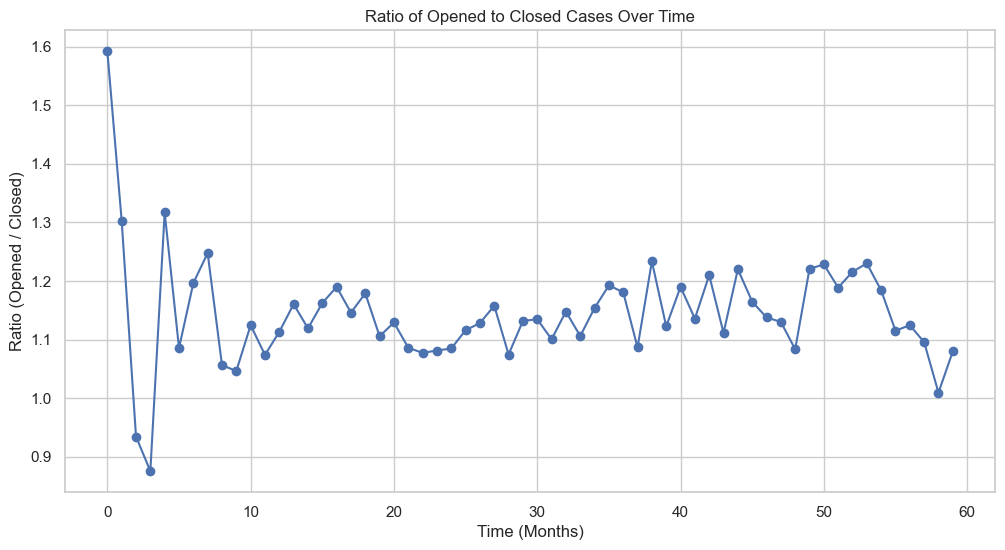

In [40]:
pre_covid_records['Closed_Year'] = pre_covid_records['CLOSED_DT'].dt.year
pre_covid_records['Closed_Month'] = pre_covid_records['CLOSED_DT'].dt.month
pre_covid_records['Opened_Year'] = pre_covid_records['OPEN_DT'].dt.year
pre_covid_records['Opened_Month'] = pre_covid_records['OPEN_DT'].dt.month

# Group the data by year and month
closed_cases = pre_covid_records.groupby(['Closed_Year', 'Closed_Month']).size().reset_index(name='Closed_Cases')
opened_cases = pre_covid_records.groupby(['Opened_Year', 'Opened_Month']).size().reset_index(name='Opened_Cases')

# Merge the two dataframes on year and month
monthly_data = closed_cases.merge(opened_cases, left_on=['Closed_Year', 'Closed_Month'], right_on=['Opened_Year', 'Opened_Month'], how='outer')

# Calculate the ratio of opened to closed cases
monthly_data['Ratio_Opened_to_Closed'] = monthly_data['Opened_Cases'] / monthly_data['Closed_Cases']

# Plot the ratio over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['Ratio_Opened_to_Closed'], marker='o', linestyle='-')
plt.title('Ratio of Opened to Closed Cases Over Time')
plt.xlabel('Time (Months)')
plt.ylabel('Ratio (Opened / Closed)')
plt.grid(True)
plt.show()

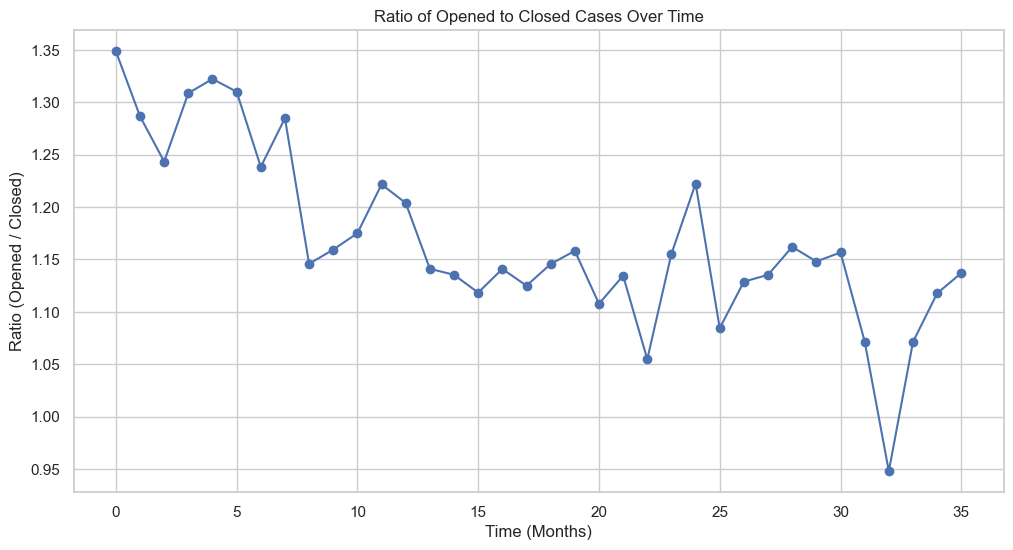

In [41]:
post_covid_records['Closed_Year'] = post_covid_records['CLOSED_DT'].dt.year
post_covid_records['Closed_Month'] = post_covid_records['CLOSED_DT'].dt.month
post_covid_records['Opened_Year'] = post_covid_records['OPEN_DT'].dt.year
post_covid_records['Opened_Month'] = post_covid_records['OPEN_DT'].dt.month

# Group the data by year and month
closed_cases = post_covid_records.groupby(['Closed_Year', 'Closed_Month']).size().reset_index(name='Closed_Cases')
opened_cases = post_covid_records.groupby(['Opened_Year', 'Opened_Month']).size().reset_index(name='Opened_Cases')

# Merge the two dataframes on year and month
monthly_data = closed_cases.merge(opened_cases, left_on=['Closed_Year', 'Closed_Month'], right_on=['Opened_Year', 'Opened_Month'], how='outer')

# Calculate the ratio of opened to closed cases
monthly_data['Ratio_Opened_to_Closed'] = monthly_data['Opened_Cases'] / monthly_data['Closed_Cases']

# Plot the ratio over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['Ratio_Opened_to_Closed'], marker='o', linestyle='-')
plt.title('Ratio of Opened to Closed Cases Over Time')
plt.xlabel('Time (Months)')
plt.ylabel('Ratio (Opened / Closed)')
plt.grid(True)
plt.show()

### 7. How has the average resolution time changed through years?

In [42]:
resolution_time(pre_covid_records)

,TYPE,CASE_ENQUIRY_ID,CLOSED_DT,LOCATION,OPEN_DT,REASON,SOURCE,SUBJECT,LocationID,X,Y,NSA_NAME,BRA_PD,SEASON,YEAR,RESOLUTION_TIME,Closed_Year,Closed_Month,Opened_Year,Opened_Month
0,Animal Found,101001240881,NaT,"961 William T Morrissey Blvd, Dorchester, MA ...",2015-01-01,Animal Issues,Constituent Call,Animal Control,1.602538e+09,-71.047358,42.291380,Neponset/Port Norfolk,South Dorchester,WINTER,2015,NaN,NaN,NaN,2015,1
1,Animal Found,101001240807,NaT,"27 Shepard St, Brighton, MA 02135",2015-01-01,Animal Issues,Constituent Call,Animal Control,2.205456e+09,-71.150565,42.347037,Brighton - St Elizabeth's,Allston/Brighton,WINTER,2015,NaN,NaN,NaN,2015,1
2,Animal Found,101001240873,NaT,"834-842 Morton St, Dorchester, MA 02124",2015-01-01,Animal Issues,Constituent Call,Animal Control,1.403860e+09,-71.085420,42.281095,W Codman Hill/W. Lower Mills,Mattapan,WINTER,2015,NaN,NaN,NaN,2015,1
3,Animal Found,101001240750,NaT,"730 Adams St, Dorchester, MA 02122",2015-01-01,Animal Issues,Constituent Call,Animal Control,1.603632e+09,-71.055173,42.284816,Neponset/Port Norfolk,South Dorchester,WINTER,2015,NaN,NaN,NaN,2015,1
4,Animal Found,101001240740,NaT,"4833 Washington St, West Roxbury, MA 02132",2015-01-01,Animal Issues,Constituent Call,Animal Control,2.002788e+09,-71.146118,42.271168,Upper Washington/Spring St,West Roxbury,WINTER,2015,NaN,NaN,NaN,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419946,Unsatisfactory Living Conditions,101003147591,2020-01-02,"333 Massachusetts Ave, Boston, MA 02115",2019-12-31,Housing,Constituent Call,Inspectional Services,4.022770e+08,-71.084650,42.342220,Fenway,Fenway/Kenmore,WINTER,2019,2.0,2020.0,1.0,2019,12
1419947,Unsatisfactory Living Conditions,101003147797,NaT,"174 W Eighth St, South Boston, MA 02127",2019-12-31,Housing,Constituent Call,Inspectional Services,6.008190e+08,-71.052450,42.334090,D Street/West Broadway,South Boston,WINTER,2019,NaN,NaN,NaN,2019,12
1419948,Unshoveled Sidewalk,101003147996,2019-12-31,"560 Boylston St, Boston, MA 02116",2019-12-31,Code Enforcement,Mobile Request,Public Works Department,4.010890e+08,-71.076350,42.349960,Back Bay East,Back Bay/Beacon Hill,WINTER,2019,0.0,2019.0,12.0,2019,12
1419949,Utility Casting Repair,101003147474,NaT,"567-569 Bennington St, East Boston, MA 02128",2019-12-31,Highway Maintenance,City Worker App,Public Works Department,1.008770e+08,-71.018120,42.382470,Harbor View/Orient Heights,East Boston,WINTER,2019,NaN,NaN,NaN,2019,12


In [43]:
resolution_time(post_covid_records)

,TYPE,CASE_ENQUIRY_ID,CLOSED_DT,LOCATION,OPEN_DT,REASON,SOURCE,SUBJECT,LocationID,X,Y,NSA_NAME,BRA_PD,SEASON,YEAR,Closed_Year,Closed_Month,Opened_Year,Opened_Month,RESOLUTION_TIME
0,Abandoned Bicycle,101003148635,2020-03-12,"70 Burbank St, Boston, MA 02115",2020-01-01,Abandoned Bicycle,Mobile Request,Mayor's 24 Hour Hotline,4.014760e+08,-71.088920,42.344290,Fenway,Fenway/Kenmore,WINTER,2020,2020.0,3.0,2020,1,71.0
1,Abandoned Bicycle,101003148558,2020-01-13,"461 Gallivan Blvd, Dorchester, MA 02124",2020-01-01,Abandoned Bicycle,Constituent Call,Mayor's 24 Hour Hotline,1.605083e+09,-71.057980,42.282010,East Lower Mills/Cedar Grove,South Dorchester,WINTER,2020,2020.0,1.0,2020,1,12.0
2,Abandoned Vehicles,101003148571,2020-01-13,"INTERSECTION of Milwood St & Gallivan Blvd, Do...",2020-01-01,Enforcement & Abandoned Vehicles,Mobile Request,Transportation - Traffic Division,NaN,-71.057802,42.282298,NaN,NaN,WINTER,2020,2020.0,1.0,2020,1,12.0
3,Abandoned Vehicles,101003148542,2020-01-18,"10 Stanbro St, Hyde Park, MA 02136",2020-01-01,Enforcement & Abandoned Vehicles,Mobile Request,Transportation - Traffic Division,1.809755e+09,-71.132410,42.235530,Readville,Hyde Park,WINTER,2020,2020.0,1.0,2020,1,17.0
4,Abandoned Vehicles,101003148439,2020-01-02,"8 Pleasanton St, Dorchester, MA 02121",2020-01-01,Enforcement & Abandoned Vehicles,Mobile Request,Transportation - Traffic Division,1.202261e+09,-71.087270,42.310860,Washington Park,Roxbury,WINTER,2020,2020.0,1.0,2020,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947143,Sign Repair,101004615702,2023-01-11,"INTERSECTION of Beacham St & Gardner St, Charl...",2022-12-31,Signs & Signals,Mobile Request,Transportation - Traffic Division,NaN,-71.075020,42.385047,NaN,NaN,WINTER,2022,2023.0,1.0,2022,12,11.0
947144,Street Light Knock Downs,101004615130,NaT,"INTERSECTION of Albany St & Frontage Rd, Roxbu...",2022-12-31,Street Lights,Constituent Call,Public Works Department,NaN,-71.063892,42.340238,NaN,NaN,WINTER,2022,NaN,NaN,2022,12,NaN
947145,Street Light Outages,101004615151,2023-01-03,INTERSECTION of Head Island Cswy & William J D...,2022-12-31,Street Lights,Mobile Request,Public Works Department,NaN,-71.023210,42.333521,NaN,NaN,WINTER,2022,2023.0,1.0,2022,12,3.0
947146,Street Light Outages,101004615718,2023-01-06,"INTERSECTION of Waldeck St & Geneva Ave, Dorch...",2022-12-31,Street Lights,Mobile Request,Public Works Department,NaN,-71.064783,42.299475,NaN,NaN,WINTER,2022,2023.0,1.0,2022,12,6.0


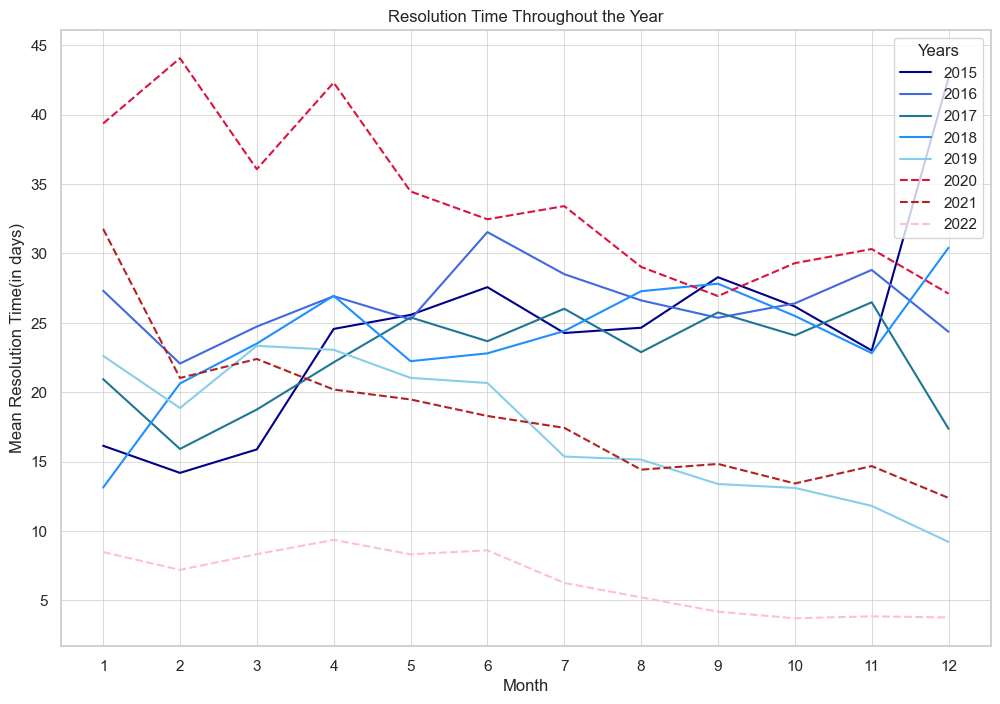

In [44]:
pre_covid_monthly_means = calculate_monthly_mean_resolution(pre_covid_records)
post_covid_monthly_means = calculate_monthly_mean_resolution(post_covid_records)

# Custom colors for each line
pre_covid_colors = ['#00008B', '#4169E1', '#1E7694', '#1E90FF','#87CEEB']  # Add your custom colors here for pre-covid records
post_covid_colors = ['#DC143C', '#B22222', 'pink']  # Add your custom colors here for post-covid records

plt.figure(figsize=(12, 8))

# Plot pre-covid records
for i, (year, monthly_mean) in enumerate(pre_covid_monthly_means):
    x = range(1, 13)
    plt.plot(x, monthly_mean, label=f'{year}', color=pre_covid_colors[i])

# Plot post-covid records
for i, (year, monthly_mean) in enumerate(post_covid_monthly_means):
    x = range(1, 13)
    plt.plot(x, monthly_mean, label=f'{year}', linestyle='--', color=post_covid_colors[i])
    
    
plt.legend(title = 'Years')
plt.title('Resolution Time Throughout the Year')
plt.xlabel('Month')
plt.ylabel('Mean Resolution Time(in days)')
plt.xticks(range(1, 13))
plt.grid(True, linewidth = 0.5)
plt.show()

### 8. What is the average resolution time for each type of case?

In [45]:
pre_covid_records['REASON'].nunique()

64

In [46]:
# Group the data by 'REASON' and calculate the mean resolution time for each type
average_resolution_time_by_type = pre_covid_records.groupby('REASON')['RESOLUTION_TIME'].mean()

# Sort the result in ascending order
average_resolution_time_by_type_sorted = average_resolution_time_by_type.sort_values(ascending=True)

# Display the result
average_resolution_time_by_type_sorted.apply(lambda x: f'{x:.2f}').to_frame().head(10)

,RESOLUTION_TIME
REASON,
Administration,0.00
Massport,0.00
Call Inquiry,0.01
Administrative,0.50
Knowledge,0.75
Code Enforcement,1.29
Needle Program,1.86
Consumer Affairs Issues,2.40
Sanitation,3.40


In [47]:
# Sort the result in ascending order
average_resolution_time_by_type_sorted = average_resolution_time_by_type.sort_values(ascending=False)

# Display the result
average_resolution_time_by_type_sorted.apply(lambda x: f'{x:.2f}').to_frame().head(10)

,RESOLUTION_TIME
REASON,
Survey,1646.13
Test Cases,619.00
Operations,300.48
Boston Bikes,123.43
Trees,101.57
Billing,101.00
Parking Complaints,96.82
Abandoned Bicycle,96.60
Traffic Management & Engineering,91.62


### 9. Are there any outliers in the resolution time? If so, what types of cases are associated with these outliers?

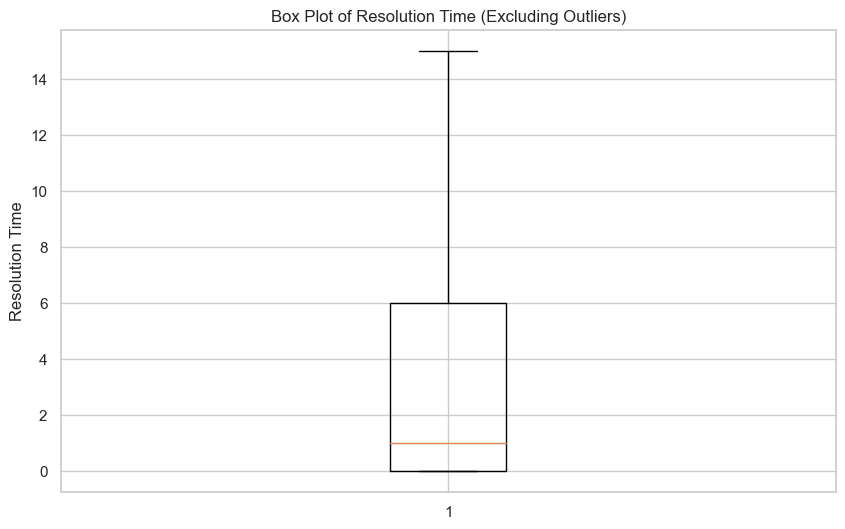

In [48]:
pre_covid_records.dropna(subset=['RESOLUTION_TIME'], inplace=True)

# Create a box plot without considering outliers
plt.figure(figsize=(10, 6))
plt.boxplot((pre_covid_records['RESOLUTION_TIME']), showfliers=False)

# Set labels and title
plt.ylabel('Resolution Time')
plt.title('Box Plot of Resolution Time (Excluding Outliers)')

# Display the plot
plt.show()

In [49]:
# Calculate the IQR (Interquartile Range)
Q1 = pre_covid_records['RESOLUTION_TIME'].quantile(0.25)
Q3 = pre_covid_records['RESOLUTION_TIME'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = pre_covid_records[(pre_covid_records['RESOLUTION_TIME'] < lower_bound) | (pre_covid_records['RESOLUTION_TIME'] > upper_bound)].groupby('REASON').size()

# Display the outliers
print("Count of Outliers by REASON:")
print(outliers.sort_values(ascending=False).head(10))

Count of Outliers by REASON:
REASON
Trees                               22850
General Request                     20167
Building                            16373
Highway Maintenance                 14567
Street Lights                       14516
Recycling                           13222
Enforcement & Abandoned Vehicles    10915
Signs & Signals                     10511
Graffiti                            10131
Street Cleaning                      9889
dtype: int64


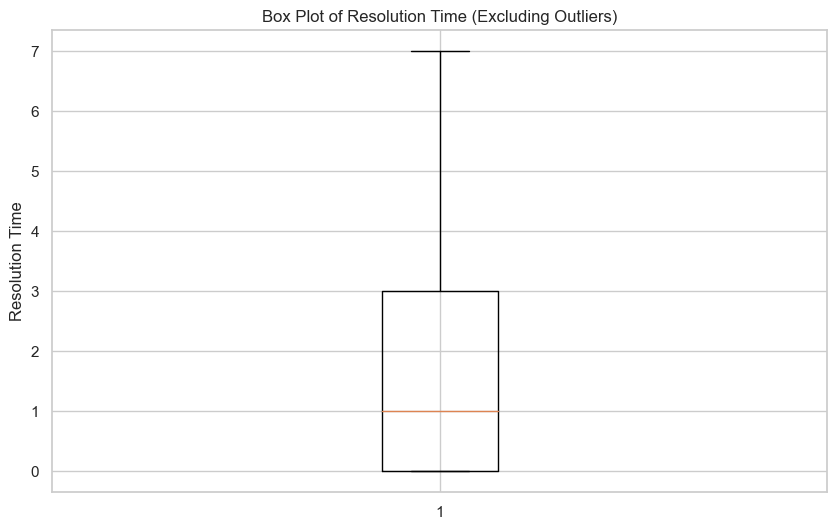

In [50]:
post_covid_records.dropna(subset=['RESOLUTION_TIME'], inplace=True)

# Create a box plot without considering outliers
plt.figure(figsize=(10, 6))
plt.boxplot((post_covid_records['RESOLUTION_TIME']), showfliers=False)

# Set labels and title
plt.ylabel('Resolution Time')
plt.title('Box Plot of Resolution Time (Excluding Outliers)')

# Display the plot
plt.show()

In [51]:
# Calculate the IQR (Interquartile Range)
Q1 = post_covid_records['RESOLUTION_TIME'].quantile(0.25)
Q3 = post_covid_records['RESOLUTION_TIME'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = post_covid_records[(post_covid_records['RESOLUTION_TIME'] < lower_bound) | (post_covid_records['RESOLUTION_TIME'] > upper_bound)].groupby('REASON').size()

# Display the outliers
print("Count of Outliers by TYPE:")
print(outliers.sort_values(ascending=False).head(10))

Count of Outliers by TYPE:
REASON
Recycling                           21772
General Request                     16074
Trees                               13205
Enforcement & Abandoned Vehicles    10976
Street Lights                       10539
Building                            10043
Sanitation                           9561
Signs & Signals                      8777
Graffiti                             8271
Highway Maintenance                  5405
dtype: int64


### 10. Is there any correlation between the resolution time and location?

In [52]:
# Drop rows where either 'Resolution_Time' or 'LocationID' is NaN
pre_covid_records.dropna(subset=['RESOLUTION_TIME', 'LocationID'], inplace=True)

# Calculate the correlation
correlation, _ = pearsonr(pre_covid_records['RESOLUTION_TIME'], pre_covid_records['LocationID'])

In [53]:
print(f"The Pearson correlation coefficient between Resolution Time and Location ID is: {correlation}")

The Pearson correlation coefficient between Resolution Time and Location ID is: -0.020532310353802468


Pearson correlation coefficient of -0.02 between resolution time and location ID suggests that there is virtually no meaningful linear relationship between these two variables.